### Comparison of Resident & Outmigrator Median Incomes:
(Analysis covers individual & family incomes)

*Note: Does not apply PERWT

In [1]:
import pandas as pd
import numpy as np
import altair as alt

#### Resident Data:

In [2]:
residents = pd.read_csv('la_residents_data.csv')

In [3]:
#Removing records with missing income data
indiv_res = residents[(residents.INCTOT != 9999999)]
fam_res = residents[(residents.FTOTINC != 9999999)]

#### Outmigrator Data:

In [4]:
outmigrators = pd.read_csv('ipums_clean.csv')

In [5]:
#Removing records with missing income data
indiv_out = outmigrators[(outmigrators.INCTOT != 9999999)]
fam_out = outmigrators[(outmigrators.FTOTINC != 9999999)]

-------

#### (1) Individual Income:

Outmigrators:

In [6]:
ind_outmigrators_all = {}
for year in range(2006, 2018):
    df = indiv_out[indiv_out.YEAR == year]
    income = df.INCTOT.median()
    ind_outmigrators_all[year] = income

In [7]:
ind_outmigrators_all

{2006: 14000.0,
 2007: 16700.0,
 2008: 15000.0,
 2009: 14400.0,
 2010: 12000.0,
 2011: 9000.0,
 2012: 10000.0,
 2013: 10400.0,
 2014: 13000.0,
 2015: 11300.0,
 2016: 14550.0,
 2017: 15400.0}

Residents:

In [8]:
#Median individual income for residents
ind_residents_all = {}
for year in range(2006, 2018):
    df = indiv_res[indiv_res.YEAR == year]
    income = df.INCTOT.median()
    ind_residents_all[year] = income

In [9]:
ind_residents_all

{2006: 19800.0,
 2007: 20000.0,
 2008: 20000.0,
 2009: 20000.0,
 2010: 18200.0,
 2011: 16900.0,
 2012: 17600.0,
 2013: 18000.0,
 2014: 18200.0,
 2015: 20000.0,
 2016: 20000.0,
 2017: 22000.0}

#### Combining Individual Resident & Out Migrator data in dataframe (for plotting)

In [10]:
#Outmigrators
out_ind_inc_df = pd.DataFrame.from_dict(ind_outmigrators_all, orient='index').reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)
out_ind_inc_df['Status'] = np.full(len(out_ind_inc_df), 'Out Migrators')

#Residents
res_ind_inc_df = pd.DataFrame.from_dict(ind_residents_all, orient='index').reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)
res_ind_inc_df['Status'] = np.full(len(res_ind_inc_df), 'Residents')

In [11]:
combined_ind_out_res = pd.concat([res_ind_inc_df, out_ind_inc_df])

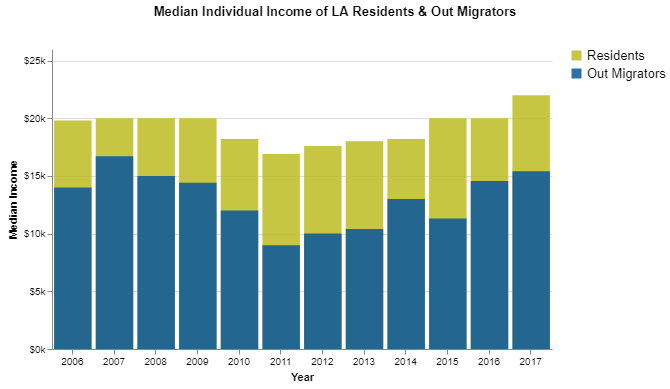

In [12]:
#Plotting via Altair
title = alt.TitleParams(text='Median Individual Income of LA Residents & Out Migrators', offset=30, anchor='middle')

individual = alt.Chart(combined_ind_out_res).configure_axis(labelAngle=0).mark_bar(opacity=0.85).encode(
    x = alt.X('Year:O', title='Year'),
    y = alt.Y('Med_Income', title='Median Income', axis=alt.Axis(format='$s'), scale=alt.Scale(domain=[0,25000]), stack=None),
    color = alt.Color('Status:N', title=None, scale=alt.Scale(range=['#bcbd22', '#08589e'], domain=['Residents', 'Out Migrators']))
).configure_legend(titleFontSize=13,
                   labelFontSize=13,
                   symbolSize=100
).configure_view(strokeWidth=0
).properties(title=title, width=500, background='white')

individual

In [13]:
individual.save('indiv_inc_res_vs_out_no_perwt.png', scale_factor=3)

-------

#### (2) Family Income:

Outmigrators:

In [14]:
fam_outmigrators_all = {}
for year in range(2006, 2018):
    df = fam_out[fam_out.YEAR == year]
    income = df.FTOTINC.median()
    fam_outmigrators_all[year] = income

In [15]:
fam_outmigrators_all

{2006: 47400.0,
 2007: 52000.0,
 2008: 52300.0,
 2009: 51000.0,
 2010: 49000.0,
 2011: 45000.0,
 2012: 48780.0,
 2013: 50000.0,
 2014: 54000.0,
 2015: 55000.0,
 2016: 60000.0,
 2017: 61500.0}

Residents:

In [16]:
fam_residents_all = {}
for year in range(2006, 2018):
    df = fam_res[fam_res.YEAR == year]
    income = df.FTOTINC.median()
    fam_residents_all[year] = income

In [17]:
fam_residents_all

{2006: 59000.0,
 2007: 61200.0,
 2008: 64000.0,
 2009: 62200.0,
 2010: 60000.0,
 2011: 57600.0,
 2012: 58920.0,
 2013: 60500.0,
 2014: 62000.0,
 2015: 65200.0,
 2016: 69000.0,
 2017: 73600.0}

#### Combining Family Out Migrator & Resident data in dataframe (for plotting)

In [18]:
#Outmigrators
out_fam_inc_df = pd.DataFrame.from_dict(fam_outmigrators_all, orient='index').reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)
out_fam_inc_df['Status'] = np.full(len(out_fam_inc_df), 'Out Migrators')

#Residents
res_fam_inc_df = pd.DataFrame.from_dict(fam_residents_all, orient='index').reset_index().rename({'index':'Year', 0:'Med_Income'}, axis=1)
res_fam_inc_df['Status'] = np.full(len(res_fam_inc_df), 'Residents')

In [19]:
combined_fam_out_res = pd.concat([res_fam_inc_df, out_fam_inc_df])

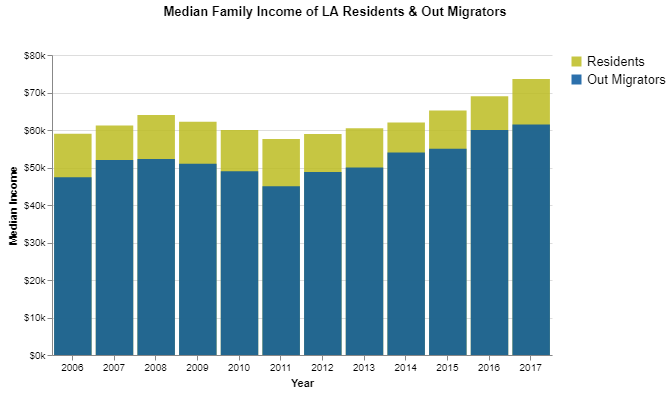

In [20]:
#Plotting via Altair
title = alt.TitleParams(text='Median Family Income of LA Residents & Out Migrators', offset=30, anchor='middle')

family = alt.Chart(combined_fam_out_res).configure_axis(labelAngle=0).mark_bar(opacity=0.85).encode(
    x = alt.X('Year:O', title='Year'),
    y = alt.Y('Med_Income', title='Median Income', axis=alt.Axis(format='$s'), scale=alt.Scale(domain=[0,80000]), stack=None),
    color = alt.Color('Status:N', title=None, scale=alt.Scale(range=['#bcbd22', '#08589e'], domain=['Residents', 'Out Migrators']))
).configure_legend(titleFontSize=13,
                   labelFontSize=13,
                   symbolSize=100
).configure_view(strokeWidth=0
).properties(title=title, width=500, background='white')

family

In [21]:
family.save('fam_inc_res_vs_out_no_perwt.png', scale_factor=3)